# Project 4: Page View Time Series Visualizer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [5]:
# Calculate the threshold values for the top and bottom 2.5% of the dataset
threshold_low  = df.value.quantile(0.025)
threshold_high = df.value.quantile(0.975) 



# Filter out the days with page views outside the threshold range
df_filtered = df[(df.value >= threshold_low) & (df.value <= threshold_high)]
df_filtered.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


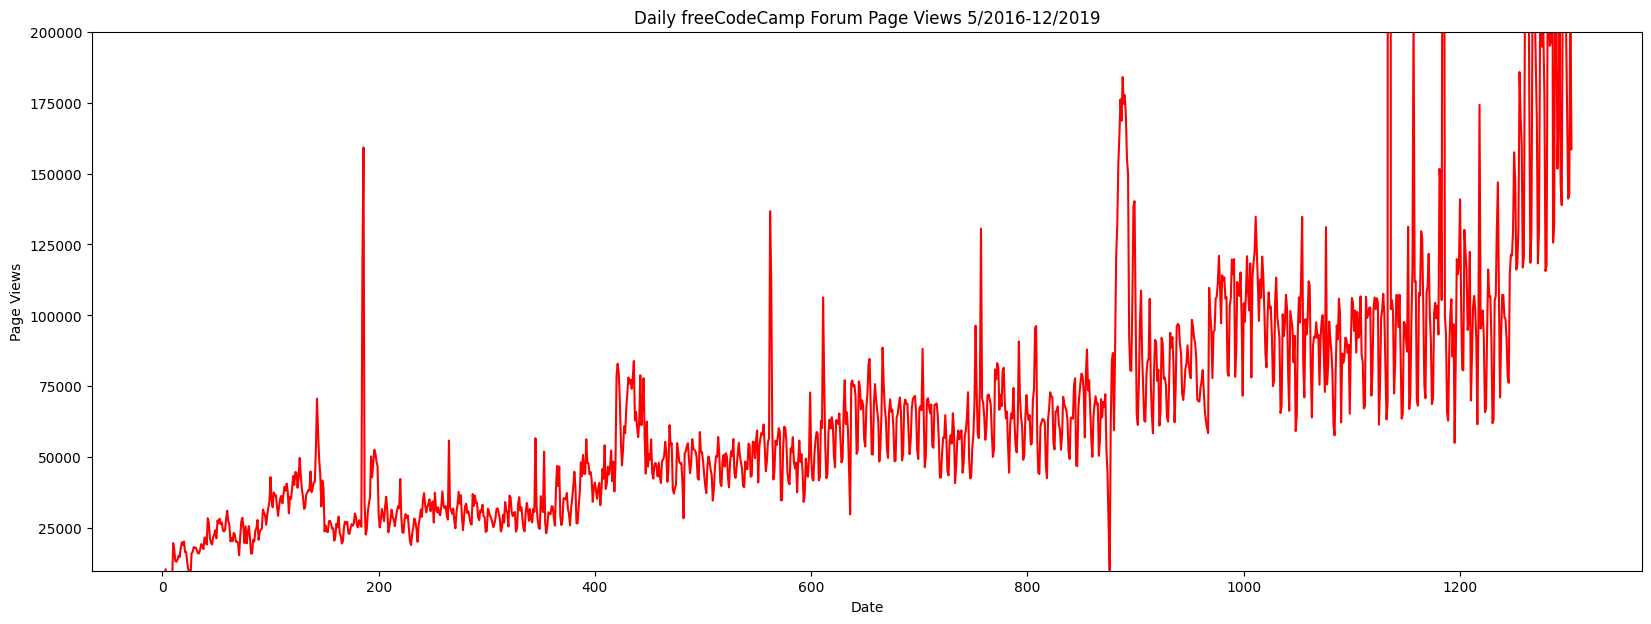

In [49]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df.index, df['value'], color='red', linewidth=1.5 )
ax.set_ylim(10000, 200000)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

fig.savefig('Plot 1')

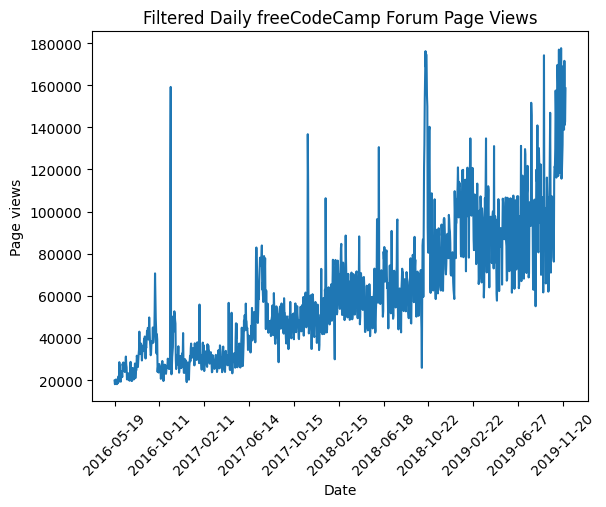

In [12]:
plt.plot(df_filtered.date, df_filtered.value)
plt.xlabel('Date')
plt.ylabel('Page views')
plt.title('Filtered Daily freeCodeCamp Forum Page Views')
plt.xticks(np.arange(0, len(df_filtered.date), len(df_filtered.date)//10))
plt.xticks(rotation=45)
plt.show()

#### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [26]:
import calendar

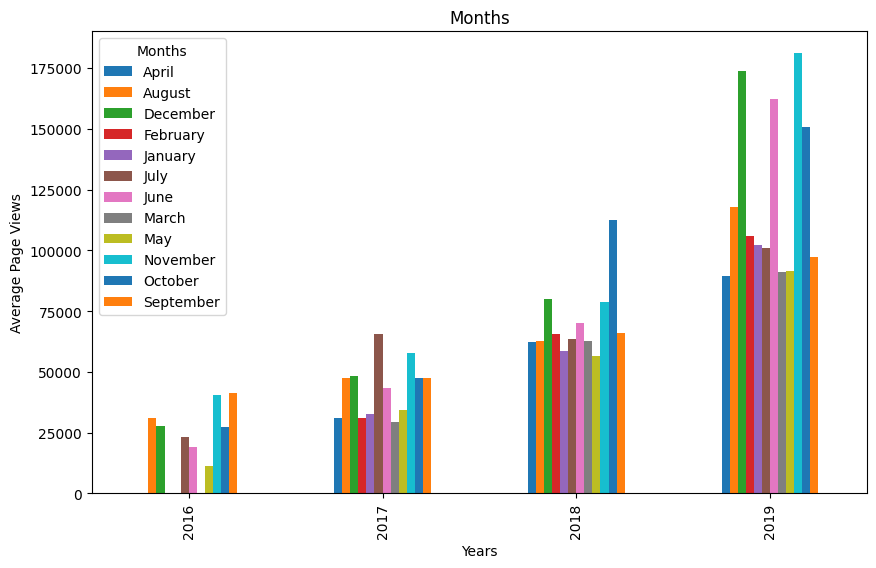

In [50]:
df['date'] = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])


df_group = df.groupby(['year', 'month_name'])['value'].mean().unstack()
df_group.plot(kind='bar', figsize=(10, 6))
plt.legend(title='Months')
plt.title('Months')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
fig.savefig('Plot 2')


In [29]:
df.head()

,date,value,year,month,month_name
0,2016-05-09,1201,2016,5,May
1,2016-05-10,2329,2016,5,May
2,2016-05-11,1716,2016,5,May
3,2016-05-12,10539,2016,5,May
4,2016-05-13,6933,2016,5,May


#### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 

In [39]:
df_group

month_name,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,23314.225806,19124.366667,NaN,11242.695652,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,112592.000000,65941.733333
2019,89368.433333,117991.032258,173870.333333,105968.357143,102056.516129,100804.451613,162402.600000,91214.483871,91439.903226,181026.700000,150862.709677,97268.833333


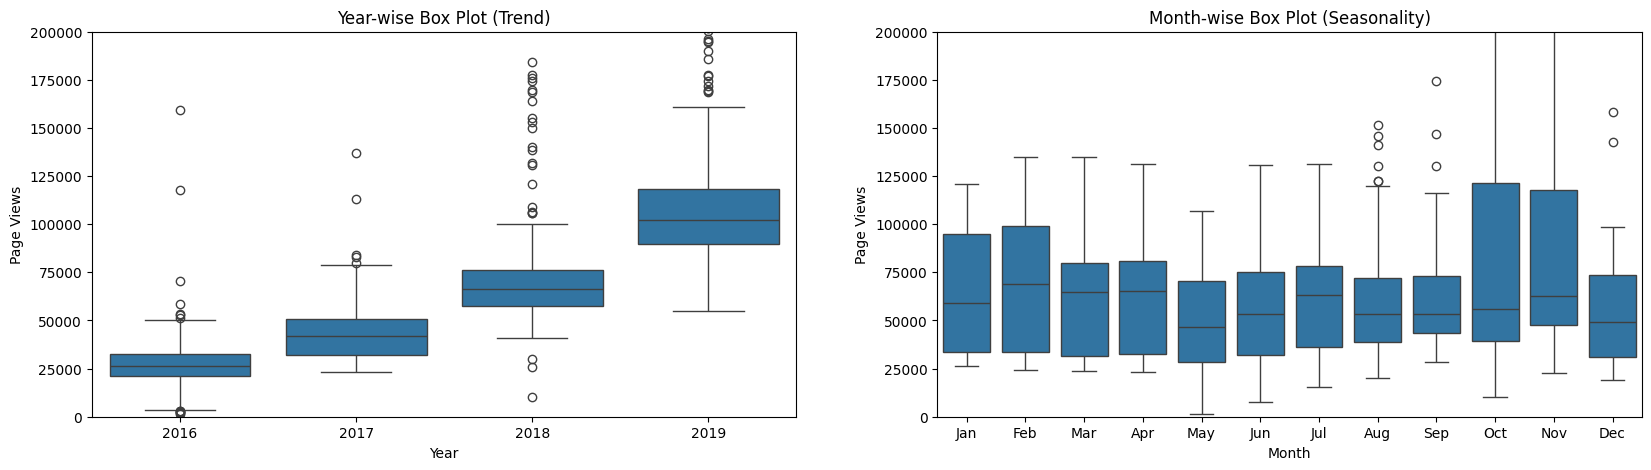

In [45]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1 = sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
ax2 = sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=mon_order);
ax1.set_ylabel('Page Views')
ax1.set_xlabel('Year')
ax1.set_title('Year-wise Box Plot (Trend)')
# plt.xlim(0, 10)
ax1.set_ylim(0, 200000)
ax2.set_ylabel('Page Views')
ax2.set_xlabel('Month')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_ylim(0, 200000)
# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')
